## Importing the Necessary Liabraries

In [1]:
import tensorflow as tf
tf.__version__

'2.11.0'

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import utils
from keras.utils import np_utils
import keras
from keras.datasets import mnist

In [3]:
from tensorflow.keras.layers import BatchNormalization

In [4]:
from keras.utils import plot_model

## Load the data set

In [5]:
# Load the dataset and split into test and train
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [6]:
# Checking the shape
X_train.shape

(60000, 28, 28)

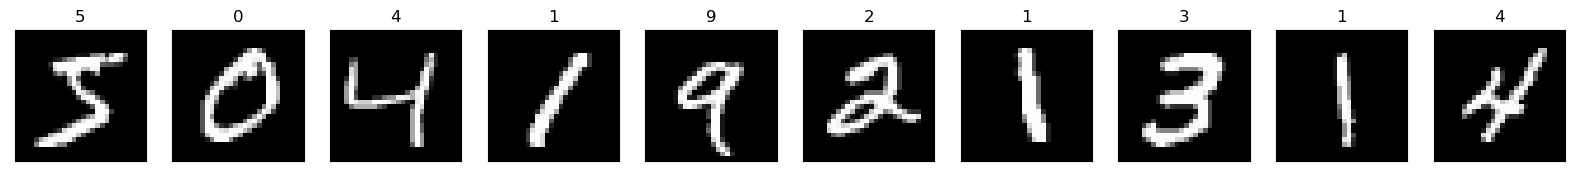

In [7]:
fig, axes = plt.subplots(ncols=10, sharex=False,
        sharey=True, figsize=(20,4))
for i in range(10):
    axes[i].set_title(y_train[i])
    axes[i].imshow(X_train[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False) # the values of axis not showing
    axes[i].get_yaxis().set_visible(False)
plt.show()
     

In [8]:
# Changing the shape
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) # reshape the train data
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1) # reshape the test data

 - We add 1 at the end because it has grey image and it has only 1 channel. thatwhy I add 1 at the end.
 - If we have RBG image thenwe used or add 3 at end.

In [9]:
# Checking sfter the reshaping
X_train.shape

(60000, 28, 28, 1)

In [10]:
# Keeping data types Same
X_train = X_train.astype('float32') # Keeping datatype same for both train and test
X_test = X_test.astype('float32')

# Normalizing the train and test
X_train /= 255     
X_test /= 255

# Converting into categorical values
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
     

- keeping the data type of train and test image as same brcause it will become easier to convoluting the whole thing when our input and output as in same data type
- x_train /= 250 due to this our values should be lies in 0 to 1

In [11]:
# after normalizing 
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## Model Building

In [12]:
# Model Building
model=Sequential()

   
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu", input_shape=(28,28,1)))
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())    

model.add(Conv2D(filters=256, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
    
model.add(Flatten())
model.add(Dense(512,activation="relu"))
    
model.add(Dense(10,activation="softmax"))
    
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

- The first is the convolutional (Conv2D) layer. It is like a set of learnable filters. I choosed to set 32 filters for the two firsts conv2D layers and 64 filters for the two second layers and 128 filters for two third layers and 256 for the last ones. Each filter transforms a part of the image (defined by the kernel size) using the kernel filter. The kernel filter matrix is applied on the whole image. Filters can be seen as a transformation of the image.

- The CNN can isolate features that are useful everywhere from these transformed images (feature maps).

- The second important layer in CNN is the pooling (MaxPool2D) layer. This layer simply acts as a downsampling filter. It looks at the 2 neighboring pixels and picks the maximal value. These are used to reduce computational cost, and to some extent also reduce overfitting. We have to choose the pooling size (i.e the area size pooled each time) more the pooling dimension is high, more the downsampling is important.

- Combining convolutional and pooling layers, CNN are able to combine local features and learn more global features of the image.

- 'relu' is the rectifier (activation function max(0,x). The rectifier activation function is used to add non linearity to the network.

- The Flatten layer is use to convert the final feature maps into a one single 1D vector. This flattening step is needed so that you can make use of fully connected layers after some convolutional/maxpool layers. It combines all the found local features of the previous convolutional layers.

- In the end i used the features in two fully-connected (Dense) layers which is just artificial an neural networks (ANN) classifier. In the last layer(Dense(10,activation="softmax")) the net outputs distribution of probability of each class.

In [13]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
model.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1, validation_data=(X_test, Y_test))
     

Epoch 1/10
1875/1875 [==============================] - 354s 187ms/step - loss: 0.0963 - accuracy: 0.9719 - val_loss: 0.0544 - val_accuracy: 0.9844
Epoch 2/10
1875/1875 [==============================] - 354s 189ms/step - loss: 0.0497 - accuracy: 0.9854 - val_loss: 0.0451 - val_accuracy: 0.9870
Epoch 3/10
1875/1875 [==============================] - 356s 190ms/step - loss: 0.0372 - accuracy: 0.9893 - val_loss: 0.0369 - val_accuracy: 0.9890
Epoch 4/10
1875/1875 [==============================] - 352s 188ms/step - loss: 0.0307 - accuracy: 0.9906 - val_loss: 0.0472 - val_accuracy: 0.9852
Epoch 5/10
1875/1875 [==============================] - 353s 188ms/step - loss: 0.0268 - accuracy: 0.9919 - val_loss: 0.0238 - val_accuracy: 0.9937
Epoch 6/10
1875/1875 [==============================] - 353s 188ms/step - loss: 0.0225 - accuracy: 0.9935 - val_loss: 0.0272 - val_accuracy: 0.9914
Epoch 7/10
1875/1875 [==============================] - 353s 188ms/step - loss: 0.0193 - accuracy: 0.9944 - val_

In [14]:
# Saving the model
model.save('mnist_cnn_model.h5')

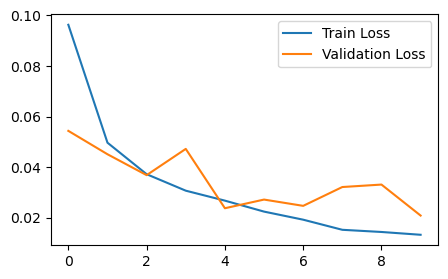

In [15]:
# Ploting the loss 
plt.figure(figsize=(5,3))
plt.plot(model.history.history['loss'], label='Train Loss')
plt.plot(model.history.history['val_loss'], label='Validation Loss')
plt.legend()

- We can see that, Train Loss and Validation loss has less difference.

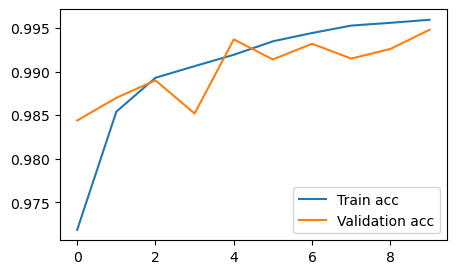

In [16]:
# ploting the accuracy
plt.figure(figsize=(5,3))
plt.plot(model.history.history['accuracy'], label='Train acc')
plt.plot(model.history.history['val_accuracy'], label='Validation acc')
plt.legend()
     

 - See, the train accuracy and testy accuracy has less difference.

In [17]:
# Loading the model
model = keras.models.load_model('mnist_cnn_model.h5')
     

## Testing the Model

In [18]:
# testing the model
x = np.reshape(X_test[2], (1, 28, 28, 1))

np.argmax(model.predict(x))
     

1/1 [==============================] - 0s 287ms/step


1